# Support Vector Machines
## Soft Margin Classification

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X,y)
svm_clf.predict([[5.5, 1.7]]) # a flower with petal length 5.5 cm and width 1.7 cm is... 1. iris virginica

array([1.])

## Nonlinear SVM Classification

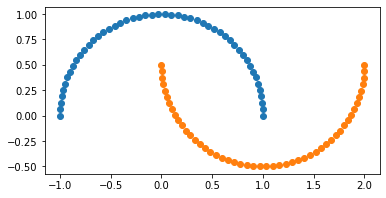

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[y==0][:,0], X[y==0][:,1])
ax.scatter(X[y==1][:,0], X[y==1][:,1])
ax.set_aspect('equal')
plt.show()

In [8]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss='hinge', max_iter=10000))
])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000))])

In [9]:
x_0, x_1 = np.meshgrid(np.linspace(-1.0, 2.0, 300), np.linspace(-0.5, 1.0, 150))
X_new = np.c_[x_0.ravel(), x_1.ravel()]
y_pred = polynomial_svm_clf.predict(X_new).reshape(150,300)

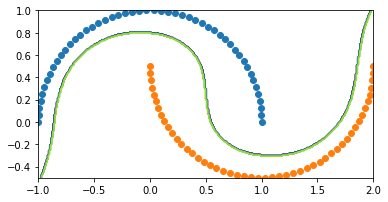

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[y==0][:,0], X[y==0][:,1])
ax.scatter(X[y==1][:,0], X[y==1][:,1])
ax.set_aspect('equal')
ax.contour(x_0, x_1, y_pred)
plt.show()

## Polynomial Kernel

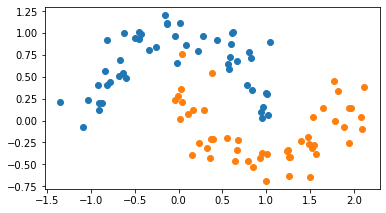

In [11]:
X, y = make_moons(noise=0.15)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[y==0][:,0], X[y==0][:,1])
ax.scatter(X[y==1][:,0], X[y==1][:,1])
ax.set_aspect('equal')
plt.show()

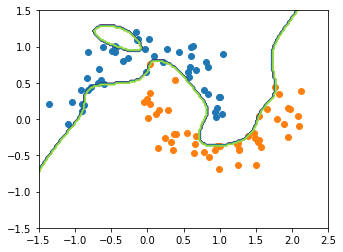

In [12]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=40, coef0=1, C=1))
])
poly_kernel_svm_clf.fit(X, y)

def plot_svm_boundary(clf):
    x_0, x_1 = np.meshgrid(np.linspace(-3.0, 3.0, 300), np.linspace(-2.0, 2.0, 200))
    X_new = np.c_[x_0.ravel(), x_1.ravel()]
    y_pred = clf.predict(X_new).reshape(200,300)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X[y==0][:,0], X[y==0][:,1])
    ax.scatter(X[y==1][:,0], X[y==1][:,1])
    ax.set_aspect('equal')
    ax.set_xlim([-1.5,2.5])
    ax.set_ylim(-1.5, 1.5)
    ax.contour(x_0, x_1, y_pred)
    
plot_svm_boundary(poly_kernel_svm_clf)
plt.show()

## Guassian RBF Kernel


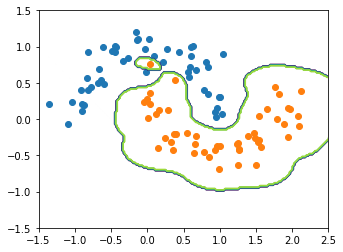

In [13]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=10, C=1e7))
])
rbf_kernel_svm_clf.fit(X, y)
plot_svm_boundary(rbf_kernel_svm_clf)
plt.show()

## SVM Regression

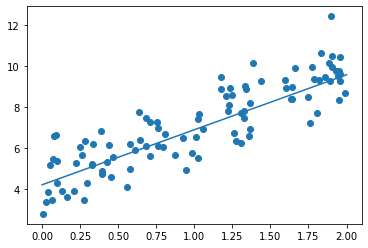

In [14]:
from sklearn.svm import LinearSVR

X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y.ravel())

x = np.linspace(0,2,100)
y_predict = svm_reg.predict(x.reshape(-1,1))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X,y)
ax.plot(x,y_predict)
plt.show()


# Exercises
### 1. What is the fundamental idea behind Support Vector Machines?
The fundamental idea, in classification, is to have the largest margin between two classes. For regression, it's to have all the data points like "on the street"

### 2. What is a support vector?
A support vector is the line connecting the decision boundary and the points closest to the decision boundary.

### 3. Why is it important to scale the inputs when using SVMs?
SVMs are sensitive to feature scales, since the "width of the street", or margin size, depends strongly on feature scales.

### 4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
No, it can't output a confidence score nor a probability. It just gives the classification.

### 5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with a million of instances and hundreds of features?
You should use the primal form since the number of instances ia larger than the number of features.

### 6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease $\gamma$? What about $C$?
You should increase $\gamma$, since this will reduce the influence of each of the landmarks, and make the decision boundary more wiggly. Simlarly, you should increase $C$ if you're underfitting.

### 7. Skip

### 8. Train a `LinearSVC` on a linearly separable dataset. Then train an `SVC` and a `SGDClassifier` on the same dataset. See if you can get them to produce roughly the same model.
Let's use the iris data set.

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [22]:
print(iris['target_names'])
print(iris['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [30]:
X = iris['data'][:, 2:]
y = (iris['target'] == 0).astype(np.float64)

(150, 2)


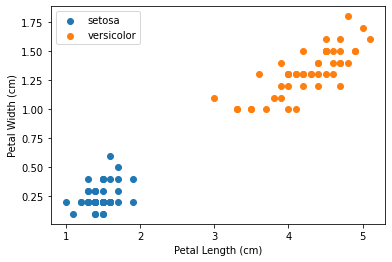

In [29]:
plt.scatter(X[iris['target'] == 0][:, 0], X[iris['target'] == 0][:, 1], label = 'setosa')
plt.scatter(X[iris['target'] == 1][:, 0], X[iris['target'] == 1][:, 1], label = 'versicolor')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

In [31]:
# Train a LinearSVC on the linearly separable dataset
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss='hinge')),
])
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
# Define a function to plot the decision boundary